## Setup

In [1]:
from xgboost import XGBRegressor
import xgboost as xgb
import numpy as np  
import xarray as xr 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
from hot_dust import preprocess
ds = preprocess.prepare_training_data() 

from importlib import reload
preprocess = reload(preprocess)

In [2]:
# Extract the values
X = ds['x'].values  
y = ds['y'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234) 

# Create an xgboost regression model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth= 5, # max depth of the individual tree cannot exceed set value
    learning_rate= 3e-4,
    subsample= 1.0, # the amount of training data sampled
    colsample_bytree= 0.8, # fraction of the features used in the trees
    n_estimators= 500 # the number of trees
)

# Train the XGBoost model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




## Metrics

In [3]:
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2:", r2)

Mean Squared Error: 0.8468977
R2: 0.08450762364285636


## Plot

C:\Users\micah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


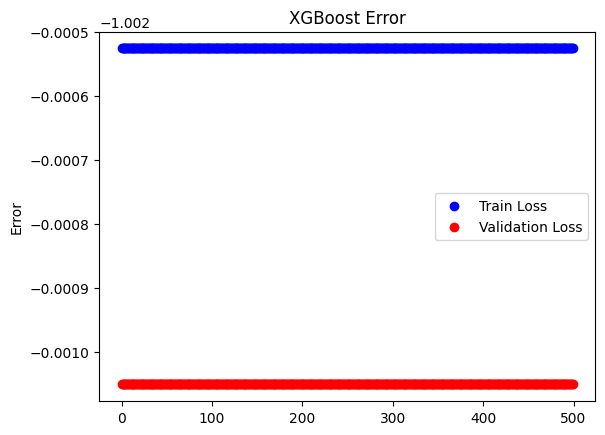

In [9]:
#Define parameters
eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=False)

# Calculate the number of epochs
results = model.evals_result()
epochs = len(results['validation_0']['error'])

# Create a list of epoch numbers
x_axis = range(0, epochs)

# Extract error values for training and validation sets
train_error = results['validation_0']['error']
validation_error = results['validation_1']['error']

# Plot error as a scatter plot for both training and validation with labels
fig, ax = plt.subplots()
ax.scatter(x_axis, train_error, label='Train Loss', color= 'blue')
ax.scatter(x_axis, validation_error, label='Validation Loss', color= 'red')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()